![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)
<br>
© 2022 Copyright The University of New South Wales - CRICOS 00098G


# Chapter 1 - Exercise 2:  Introduction to ML and Data Mining: Data Visualisation using the 'plotnine' library

# Introduction: 

As we could see in the first exercise of this chapter, we visualise our features using the 'matplotlib' and 'seaborn' libraries. However, the **'plotnine'** library is also used for data visualisation in Python.

The **plotnine** library is based on the R package ggplot2. There are some minor changes with respect to the R version, but fortunately, not many.

Tutorials: 
1. [How to install plotnine](http://plotnine.readthedocs.io/en/stable/installation.html)
2. [API reference](http://plotnine.readthedocs.io/en/stable/api.html)

In this notebook, we will use the library <b>plotnine</b> to visualise the <b> diabetes hospitalisations - inpatient hospital data set </b> that we are going to use throughout the course. That is, we will repeat only the steps 5.4 and 5.5 of Chapter 1, Exercise 1. 

## Aims
 1. To become familiar with 'plotnine' library 
 2. To use **'plotnine'** to visualise and explore our data set, in particular, how our input data are related to the output.
 

In [1]:
import sys
print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [2]:
import numpy as np
from scipy import sparse
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [4]:
# check required libraries are installed if not calling system to install
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas', 'plotnine', 'grid'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print('Installing: ', missing)
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
# delete unwanted variables
del required 
del installed 
del missing

Installing:  {'grid'}


In [4]:
# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


If you are running this notebook in Google Colab, you must define your project paths. In this case, define your `project_path`. Otherwise, all the data will be lost after you close the session.

In [5]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    project_path = Path(root) / 'MyDrive' / 'Colab Notebooks' / 'HDAT9500' / 'Week1'
    
    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

# 1. Docstring

Create a docstring with the variables and constants that you will use in this exercise (data dictionary) and the purpose of your program. It is expected that you choose informative variable names and document your program (both docstrings and comments).

<b> Write the answer here:</b>
#####################################################################################################################

(double-click here)


#####################################################################################################################

# 2. Load the data set

We import our dataset and print it. Please note that we will use the same dataset used in Chapter 1, Exercise 1. 

The data dictionary is located in: **[data/diabetes/Data_Dictionary.pdf](https://github.com/CBDRH-HDAT9500/week01/blob/a96a5830df7f2cd90bcaf671f8f69a8b92a2947f/data/diabetes/Data_Dictionary.pdf)**

In [6]:
# Read in data set
import pickle
pickle_path = Path(project_path) / 'hospital.pickle'

with open(pickle_path, 'rb') as data:
   hospital = pickle.load(data)

In [11]:
# Print the number of rows and columns using 'DataFrame.shape':
print("Number of rows and columns: ", hospital.shape) 
hospital.head()

Number of rows and columns:  (69270, 21)


,los,Age,sex,payer_code,medical_specialty,max_glu_serum,A1Cresult,number_diagnoses,num_lab_procedures,num_procedures,...,number_emergency,number_inpatient,number_outpatient,group_name_1,group_name_2,group_name_3,readmission,admission_type_id_cat,discharge_disposition_id_cat,admission_source_id_cat
0,2,79,Female,?,?,None,None,9,38,0,...,0,0,0,Other,Endocrine,Infectious,no,3,18,7
1,5,59,Male,?,Pulmonology,None,>8,8,49,0,...,0,0,0,Endocrine,Cardiac_&_circulatory,Other,no,3,1,7
2,2,33,Female,MD,?,None,None,5,62,0,...,1,0,1,Other,Endocrine,Cardiac_&_circulatory,no,3,1,7
3,6,42,Female,?,?,None,None,9,77,0,...,0,0,0,Infectious,Respiratory,Endocrine,no,3,6,7
4,1,62,Male,?,Cardiology,None,None,7,13,5,...,0,0,0,Cardiac_&_circulatory,Cardiac_&_circulatory,Cardiac_&_circulatory,no,3,1,7


In [10]:
hospital.dtypes

los                                int64
Age                                int64
sex                             category
payer_code                      category
medical_specialty                 object
max_glu_serum                   category
A1Cresult                       category
number_diagnoses                   int64
num_lab_procedures                 int64
num_procedures                     int64
num_medications                    int64
number_emergency                   int64
number_inpatient                   int64
number_outpatient                  int64
group_name_1                    category
group_name_2                    category
group_name_3                    category
readmission                       object
admission_type_id_cat           category
discharge_disposition_id_cat    category
admission_source_id_cat         category
dtype: object

# 3. Visualisation of the outcome variable: 'Readmission' 

As mentioned in the previous exercise, our final goal is: to build a predictive algorithm to predict if a patient with diabetes will be readmitted to the hospital after discharge. That is, **'readmission'** is our outcome variable. 

**Let's visualise the outcome variable to have a better idea of the differences between both classes, 'Yes' and 'No'.**

For this, we will use 'ggplot' from **plotnine** library. [More information](https://plotnine.readthedocs.io/en/stable/api.html)

In [14]:
pip install grid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [7]:
import plotnine
import grid                 # Please make sure to install grid in anaconda prompt using this command: 'pip install grid'

In [8]:
# Plot value counts with labels including proportions for each class of 'readmission'
p = plotnine.ggplot(plotnine.aes(x='readmission', y=('100*..count../sum(..count..)'), fill='readmission'), data=hospital)
p = p + plotnine.geom_bar(width=0.5) + plotnine.ylab('Proportion') + plotnine.theme_bw()
p + plotnine.geom_text(plotnine.aes(label='stat(prop)*100', group=1),stat='count',nudge_y=0.125,va='bottom',format_string='{:.0f}%')

TypeError: ignored

# 4. Visualising the features regarding "readmission" 

## 4.1. Continuous Numeric Variables by Readmission 

Lets look at how the continuous numeric variables are distributed regarding **readmission**. For this, we will use `geom_hist()` from ggplot function. [More information](https://plotnine.readthedocs.io/en/stable/api.html)

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


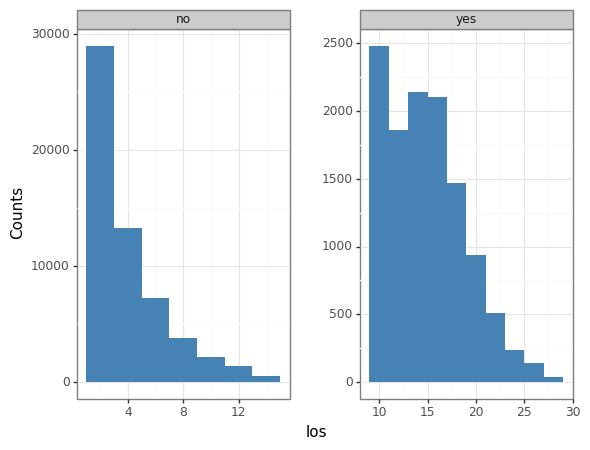

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


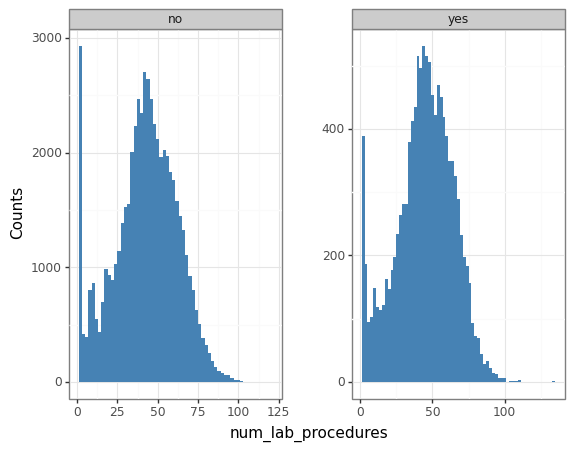

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


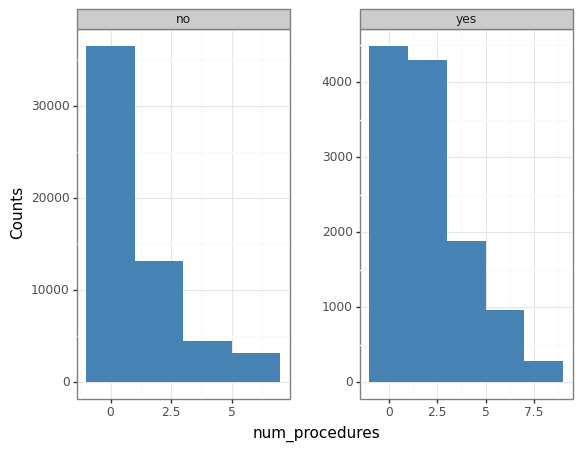

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


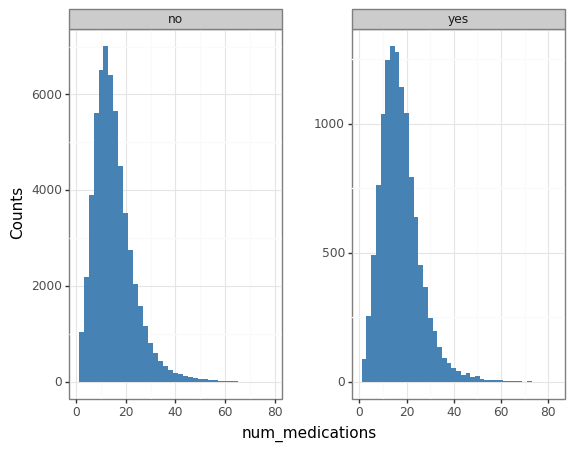

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


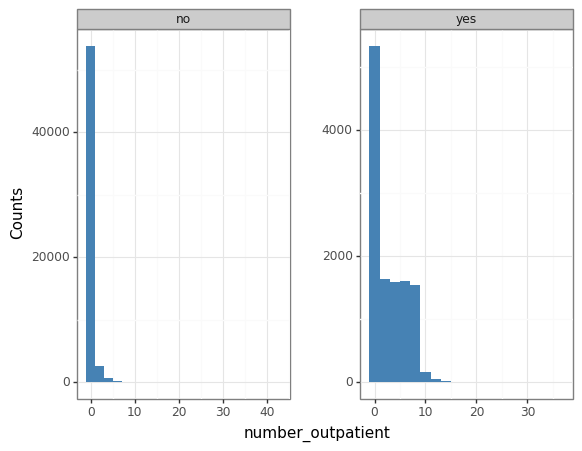

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


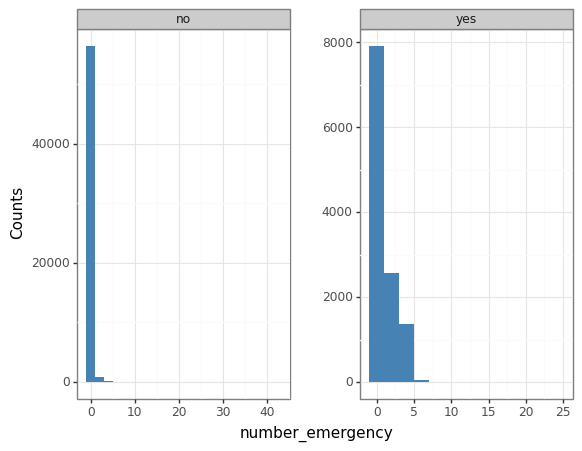

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


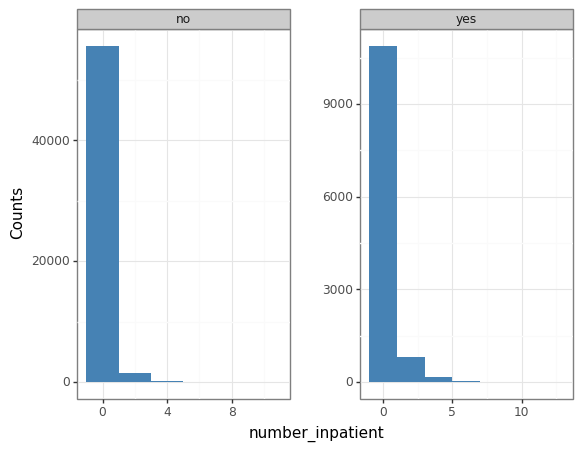

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


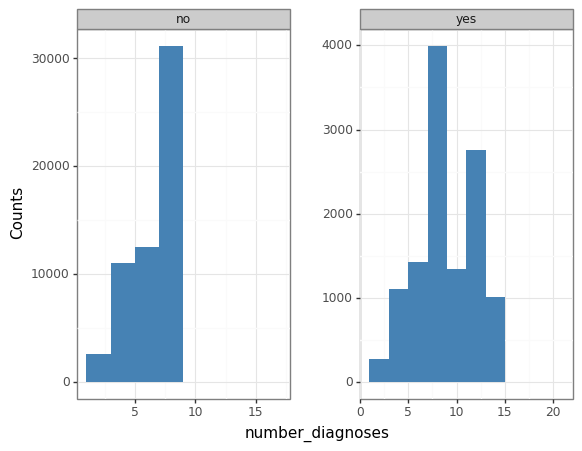

/usr/local/lib/python3.10/dist-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


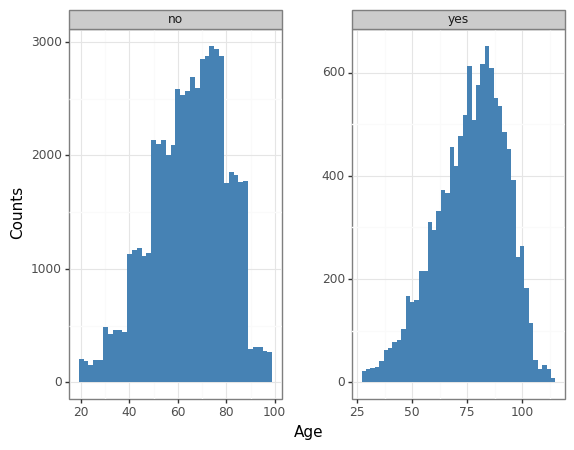

In [9]:
continuous_variables = ['los', 'num_lab_procedures','num_procedures','num_medications',
                        'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','Age']

for i in continuous_variables:
    p = plotnine.ggplot(hospital, plotnine.aes(x=i)) 
    p = p + plotnine.geom_histogram(binwidth = 2, fill = 'steelblue') + plotnine.facet_wrap('~readmission', scales="free")
    p = p + plotnine.ylab('Counts') + plotnine.theme_bw() + plotnine.theme(panel_spacing=.70)
    print(p)

### **Lets create box plots to visualise the same variables by readmission**

For this, we will use the same selection of variables defined above 'continuous_variables'. 

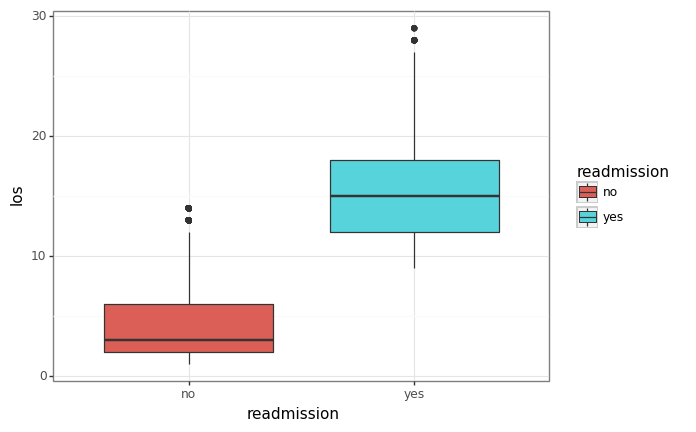

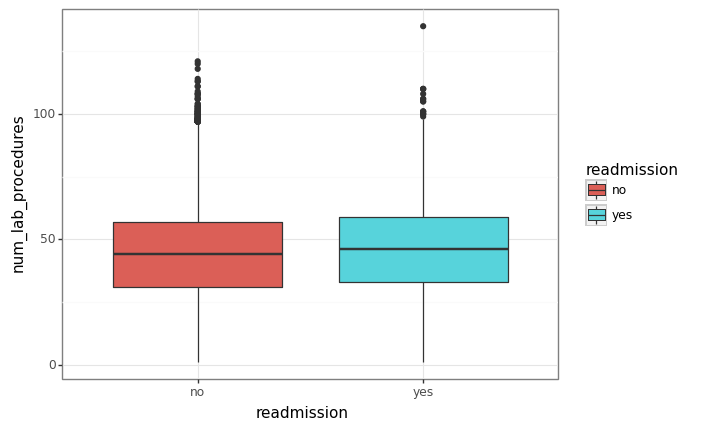

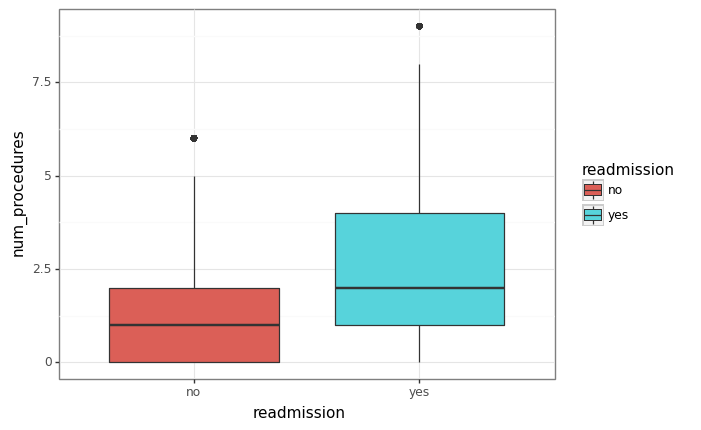

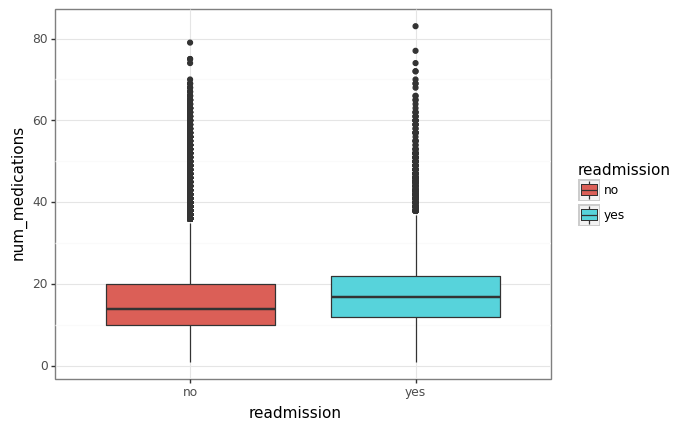

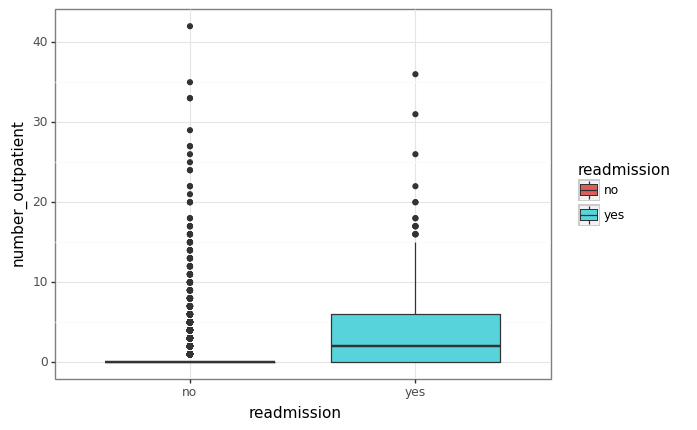

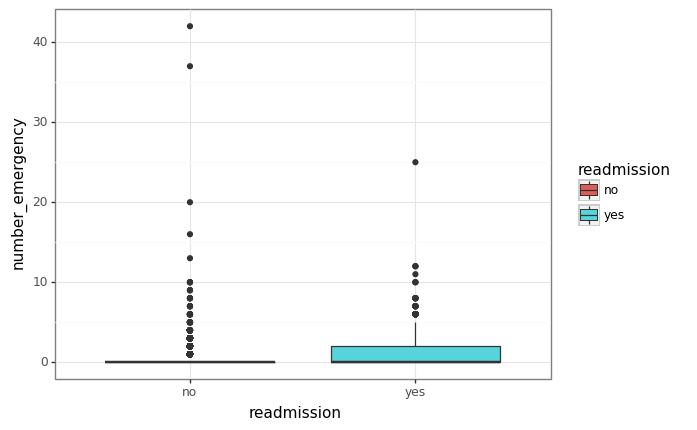

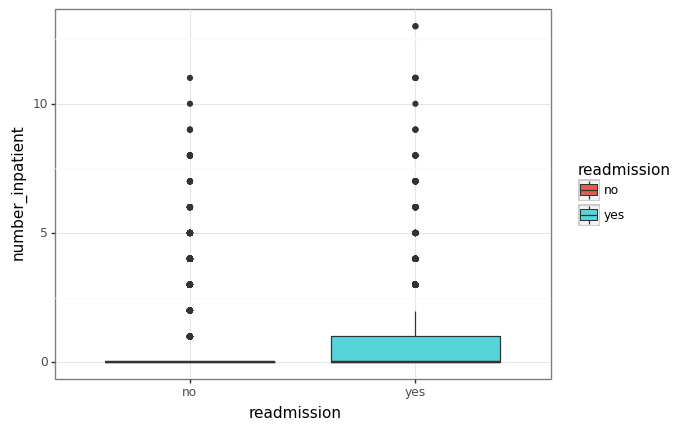

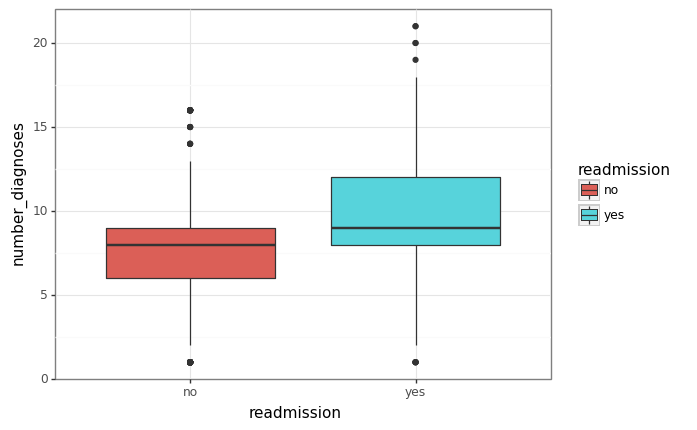

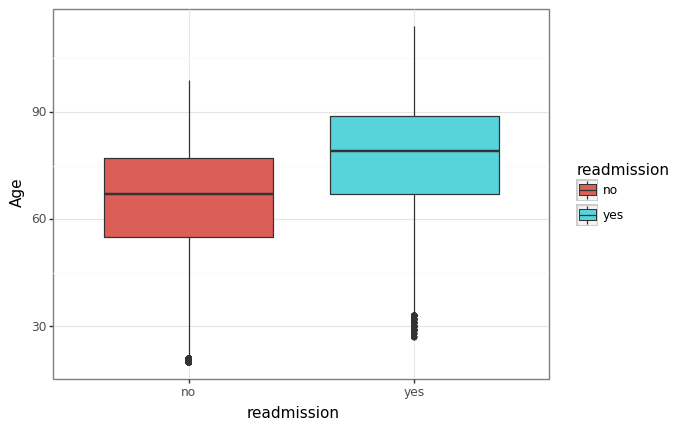

In [10]:
# Box plot of all the continuous/numeric variables regarding 'readmissions'. Python command: ggplot()+geom_boxplot()
for i in continuous_variables:
    p = plotnine.ggplot(hospital, plotnine.aes(x='readmission', y=i, fill='readmission')) 
    p = p + plotnine.geom_boxplot() + plotnine.theme_bw()
    print(p)

## 4.2 Categorical variables by readmission: 
 
Let's plot the categorical variables recorded in our dataset, focusing on our output: 'readmission'. 

In this case, we will use **`geom_bar()`** instead of `geom_hist()`. A histogram shows the distribution of a continuous numeric variable by grouping ranges of the data into bins. Bar charts plot categorical data. 

Selecting variables needed for our plots. Make sure you delete from the list below the variables you dropped from the dataset in Exercise01. 

In [11]:
categorical_variables = ['sex','payer_code','max_glu_serum','A1Cresult','admission_type_id_cat','discharge_disposition_id_cat','admission_source_id_cat', 
                        'group_name_1', 'group_name_2', 'group_name_3','medical_specialty']


In [12]:
# 'medical_specialty': it has too many categories to be properly visualised;
# Plot value counts and add labels with percentages in the same graph

for i in categorical_variables:
    p = plotnine.ggplot(plotnine.aes(x=i, fill=i), data=hospital) + plotnine.geom_bar(width=0.8)
    p = p + plotnine.geom_text(plotnine.aes(label='stat(prop)*100', group=1),stat='count',nudge_y=0.125,va='bottom',format_string='{:.0f}%')
    p = p + plotnine.theme_bw() + plotnine.theme(axis_text_x  = plotnine.element_text(angle = 90, hjust = 1), panel_spacing=.70)
    p = p + plotnine.facet_wrap('~readmission', scales='free') 
    print(p)

TypeError: ignored

As we could see, we can plot the value counts of all our features and add labels with the proportions on each bar. [More examples of **'plotnine'** and 'ggplot'](https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/)

# 5. Summary of exercise 

In this notebook, we could see different applications of **'ggplot'**, by using the library **'plotline'**. For example, we learned how to visualise continuous and categorical variables using histograms, box plots and bar plots. In addition, we applied the function `facet_wrap`, which allowed us to observe our features regarding each class of the outcome variable: 'readmissions'.

In conclusion, for data visualisation in Python, which is the step 2 of the machine learning and data mining work-flow, we can use the following libraries:
1. **matplotlib** (Example: Chapter 1, exercise 1)
2. **seaborn** (Example: Chapter 1, exercise 1)
3. **plotnine** (Example: Chapter 1, exercise 2)

[More information](https://plotnine.readthedocs.io/en/stable/api.html)

© 2022 Copyright The University of New South Wales - CRICOS 00098G